Link to kaggle: https://www.kaggle.com/code/sonnyinkai369/ghuc-recsys

In [1]:
import numpy as np
import pandas as pd
import scipy
import matplotlib as plt
import networkx as nx
import itertools
import collections
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


# Load data

In [2]:
train_by_user = pd.read_csv("/kaggle/input/datahotel/train_total_by_user_38k1.csv")
test_by_user  = pd.read_csv("/kaggle/input/datahotel/test_by_user_695.csv")
train_by_user

,URL Hotel,Location,HotelID,Name Hotel,Descriptions,Address,UserID,User,Rating
0,https://www.booking.com/hotel/vn/dalat-wind.vi...,Đà Lạt,4064,Dalat Wind Deluxe Hotel,"Tọa lạc tại thành phố Đà Lạt, cách Hồ Xuân Hươ...","Lot R2 03-04. Golf Valley, Ward 2, Đà Lạt, Viê...",1187,Thảo,6
1,https://www.booking.com/hotel/vn/dalat-wind.vi...,Đà Lạt,4064,Dalat Wind Deluxe Hotel,"Tọa lạc tại thành phố Đà Lạt, cách Hồ Xuân Hươ...","Lot R2 03-04. Golf Valley, Ward 2, Đà Lạt, Viê...",5866,Tho,6
2,https://www.booking.com/hotel/vn/dalat-wind.vi...,Đà Lạt,4064,Dalat Wind Deluxe Hotel,"Tọa lạc tại thành phố Đà Lạt, cách Hồ Xuân Hươ...","Lot R2 03-04. Golf Valley, Ward 2, Đà Lạt, Viê...",3033,Tuan,9
3,https://www.booking.com/hotel/vn/dalat-wind.vi...,Đà Lạt,4064,Dalat Wind Deluxe Hotel,"Tọa lạc tại thành phố Đà Lạt, cách Hồ Xuân Hươ...","Lot R2 03-04. Golf Valley, Ward 2, Đà Lạt, Viê...",1406,Phan,7
4,https://www.booking.com/hotel/vn/dalat-wind.vi...,Đà Lạt,4064,Dalat Wind Deluxe Hotel,"Tọa lạc tại thành phố Đà Lạt, cách Hồ Xuân Hươ...","Lot R2 03-04. Golf Valley, Ward 2, Đà Lạt, Viê...",841,Hong,8
...,...,...,...,...,...,...,...,...,...
38061,https://www.booking.com/hotel/vn/littleboss.vi...,Huế,135,LittleBoss,Căn hộ có TV màn hình phẳng. Căn hộ nằm trong...,"The Manor Crown Đường Tố Hữu, TP Huêa, Huế, Vi...",2190,Linh,6
38062,https://www.booking.com/hotel/vn/littleboss.vi...,Huế,135,LittleBoss,Căn hộ có TV màn hình phẳng. Căn hộ nằm trong...,"The Manor Crown Đường Tố Hữu, TP Huêa, Huế, Vi...",1530,Anh,9
38063,https://www.booking.com/hotel/vn/littleboss.vi...,Huế,135,LittleBoss,Căn hộ có TV màn hình phẳng. Căn hộ nằm trong...,"The Manor Crown Đường Tố Hữu, TP Huêa, Huế, Vi...",1308,Phong,7
38064,https://www.booking.com/hotel/vn/littleboss.vi...,Huế,135,LittleBoss,Căn hộ có TV màn hình phẳng. Căn hộ nằm trong...,"The Manor Crown Đường Tố Hữu, TP Huêa, Huế, Vi...",6009,Hạnh,6


Tạo tập train test, chỉ dụng các cột và đổi tên tương ứng


In [3]:
train = train_by_user.loc[:, ['UserID', 'HotelID', 'Rating']]
train = train.rename(columns={'UserID': 'UID', 'HotelID': 'MID', 'Rating': 'rate'})
train

,UID,MID,rate
0,1187,4064,6
1,5866,4064,6
2,3033,4064,9
3,1406,4064,7
4,841,4064,8
...,...,...,...
38061,2190,135,6
38062,1530,135,9
38063,1308,135,7
38064,6009,135,6


In [4]:
test = test_by_user.loc[:, ['UserID', 'HotelID', 'Rating']]
test = test.rename(columns={'UserID': 'UID', 'HotelID': 'MID', 'Rating': 'rate'})

In [5]:
df_user = pd.DataFrame(range(1, 6472), columns=['UID'])
df_user

,UID
0,1
1,2
2,3
3,4
4,5
...,...
6466,6467
6467,6468
6468,6469
6469,6470


# Finding Similarity Graph (Pretrained below)

In [ ]:
alpha_coefs = [1, 2, 3]

for alpha_coef in alpha_coefs:
    pairs = []
    grouped = train.groupby(['MID', 'rate'])
    for key, group in grouped:
        pairs.extend(list(itertools.combinations(group['UID'], 2)))
    counter = collections.Counter(pairs)
    alpha = alpha_coef * 1  # param*i_no
    edge_list = map(list, collections.Counter(el for el in counter.elements() if counter[el] >= alpha_coef).keys())
    G = nx.Graph()

    for el in edge_list:
        G.add_edge(el[0], el[1], weight=1)
        G.add_edge(el[0], el[0], weight=1)
        G.add_edge(el[1], el[1], weight=1)

    pr = nx.pagerank(G.to_directed())
    df_user['PR'] = df_user['UID'].map(pr)
    df_user['PR'] /= float(df_user['PR'].max())
    dc = nx.degree_centrality(G)
    df_user['CD'] = df_user['UID'].map(dc)
    df_user['CD'] /= float(df_user['CD'].max())
    cc = nx.closeness_centrality(G)
    df_user['CC'] = df_user['UID'].map(cc)
    df_user['CC'] /= float(df_user['CC'].max())
    bc = nx.betweenness_centrality(G)
    df_user['CB'] = df_user['UID'].map(bc)
    df_user['CB'] /= float(df_user['CB'].max())
    lc = nx.load_centrality(G)
    df_user['LC'] = df_user['UID'].map(lc)
    df_user['LC'] /= float(df_user['LC'].max())
    nd = nx.average_neighbor_degree(G, weight='weight')
    df_user['AND'] = df_user['UID'].map(nd)
    df_user['AND'] /= float(df_user['AND'].max())
    X_train = df_user[df_user.columns[1:]]
    X_train.fillna(0, inplace=True)

    X_train.to_pickle("x_train_alpha("+str(alpha_coef)+").pkl")


# Đã pretrain thì chạy file này

In [115]:
import pickle 

# Open the file in binary mode 
with open('/kaggle/input/feature-dataset-3/x_train_alpha(1) (1).pkl', 'rb') as file: 
    # Call load method to deserialze 
    X_train = pickle.load(file) 

X_train

,PR,CD,CC,CB,LC,AND
0,0.005945,0.003348,0.656719,0.000000,0.000000,0.152897
1,0.007934,0.007812,0.692069,0.000000,0.000000,0.473898
2,0.009370,0.007812,0.653841,0.001231,0.001392,0.145898
3,0.008103,0.005580,0.660553,0.000000,0.000000,0.099341
4,0.048821,0.046875,0.794395,0.017391,0.019611,0.282203
...,...,...,...,...,...,...
6466,0.013905,0.015625,0.745702,0.000195,0.000494,0.369271
6467,0.008089,0.007812,0.711322,0.000037,0.000092,0.240388
6468,0.009658,0.007812,0.647294,0.000027,0.000082,0.114040
6469,0.009115,0.010045,0.765246,0.000172,0.000274,0.517261


# User context

In [9]:
!pip install transformers -q
!pip install underthesea -q

In [10]:
#Test phobert 
#from transformers import PhobertTokenizer, PhobertModel
from sklearn.metrics.pairwise import cosine_similarity
from transformers import AutoModel, AutoTokenizer, PhobertTokenizer
import torch
import re

#Chech if a GPU is available or not 
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# Khởi tạo tokenizer và mô hình PhoBERT
phobert = AutoModel.from_pretrained("vinai/phobert-base").to(device)
tokenizer = PhobertTokenizer.from_pretrained("vinai/phobert-base")


# Ví dụ câu cần so sánh
sentence1 = "Câu số 2 "
sentence2 = "Câu số 2 "

# Tokenize và chuyển đổi câu thành embeddings
tokens1 = tokenizer(sentence1, return_tensors="pt").to(device)
tokens2 = tokenizer(sentence2, return_tensors="pt").to(device)

with torch.no_grad():
    embeddings1 = phobert(**tokens1).last_hidden_state.mean(dim=1)
    embeddings2 = phobert(**tokens2).last_hidden_state.mean(dim=1)

# Tính cosine similarity giữa embeddings
similarity = cosine_similarity(embeddings1.cpu(), embeddings2.cpu())
print(f"Cosine Similarity: {similarity[0][0]}")


Cosine Similarity: 1.0


In [11]:
#Test underthesea
from underthesea import word_tokenize
sentence = 'Chàng trai 9X Quảng Trị khởi nghiệp từ nấm sò'

word_tokenize(sentence, format="text")
#output 'Chàng_trai 9X Quảng_Trị khởi_nghiệp từ nấm sò'

'Chàng trai 9X Quảng_Trị khởi_nghiệp từ nấm sò'

In [12]:
with open('/kaggle/input/stopword-vn/vietnamese.txt', 'r', encoding='utf-8') as file: 
    stopwordvn = file.readlines()
    list_stopword = list(set(w.strip() for w in stopwordvn))

In [13]:
#Xử lý lowecrcase, stopword 
def preprocessing_data(data):
    data = data.lower()
    #Xử lý dấu câu và ký tự đặc biệt
    data = re.sub(r"[^\w\s]", " ", data)
    #Loại bỏ stopword
    data = ' '.join([word for word in data.split() if word not in list_stopword])
    #Word segment
    data = word_tokenize(data, format='text')
    #Chuyển về wordembedding
    token = tokenizer(data, return_tensors='pt', max_length=256, truncation=True).to(device)
    with torch.no_grad():
        embedding = phobert(**token).last_hidden_state.mean(dim=1).cpu()
        
    return embedding

In [14]:
from tqdm import tqdm

In [16]:
user_infor = []
for i in tqdm(range(len(df_user))):  # Assuming user IDs start from 1
    user_rows = train_by_user[train_by_user['UserID'] == (i+1)]
    
    weighted_embeddings = [preprocessing_data(row['Descriptions']) * (row['Rating']) 
                             for _, row in user_rows.iterrows()]
    sum_rating = sum([row['Rating'] for _, row in user_rows.iterrows()])
    # Sum all weighted embeddings
    user_embed = sum(weighted_embeddings)[0] / sum_rating
    user_infor.append(user_embed)

100%|██████████| 6471/6471 [16:00<00:00,  6.74it/s]  


In [17]:
with open('user_infor.pkl', 'wb') as file:
    pickle.dump(user_infor, file)

# Pretrained User Context

In [116]:
with open('/kaggle/working/user_infor.pkl', 'rb') as file:
    user_infor = pickle.load(file)
len(user_infor)

6471

In [117]:
X_train['temp'] = user_infor
X_train

,PR,CD,CC,CB,LC,AND,temp
0,0.005945,0.003348,0.656719,0.000000,0.000000,0.152897,"[tensor(0.0568), tensor(0.2775), tensor(-0.211..."
1,0.007934,0.007812,0.692069,0.000000,0.000000,0.473898,"[tensor(-0.0248), tensor(0.2068), tensor(-0.19..."
2,0.009370,0.007812,0.653841,0.001231,0.001392,0.145898,"[tensor(0.0160), tensor(0.3816), tensor(-0.261..."
3,0.008103,0.005580,0.660553,0.000000,0.000000,0.099341,"[tensor(-0.0510), tensor(0.0755), tensor(-0.35..."
4,0.048821,0.046875,0.794395,0.017391,0.019611,0.282203,"[tensor(-0.0064), tensor(0.2866), tensor(-0.20..."
...,...,...,...,...,...,...,...
6466,0.013905,0.015625,0.745702,0.000195,0.000494,0.369271,"[tensor(0.0284), tensor(0.1865), tensor(-0.258..."
6467,0.008089,0.007812,0.711322,0.000037,0.000092,0.240388,"[tensor(0.0015), tensor(0.3377), tensor(-0.249..."
6468,0.009658,0.007812,0.647294,0.000027,0.000082,0.114040,"[tensor(-0.0624), tensor(0.2923), tensor(-0.19..."
6469,0.009115,0.010045,0.765246,0.000172,0.000274,0.517261,"[tensor(-0.0604), tensor(0.2354), tensor(-0.12..."


In [118]:
# Split the values in column 0 into 5 separate columns
b_split = X_train['temp'].apply(pd.Series)

# Rename the new columns if needed
b_split.columns = [f'col_{i+1}' for i in range(b_split.shape[1])]

# Concatenate the original DataFrame with the new columns
X_train = pd.concat([X_train, b_split], axis=1)

# Drop the original column 0
X_train = X_train.drop(columns=['temp'])

# Display the modified DataFrame
X_train

,PR,CD,CC,CB,LC,AND,col_1,col_2,col_3,col_4,...,col_759,col_760,col_761,col_762,col_763,col_764,col_765,col_766,col_767,col_768
0,0.005945,0.003348,0.656719,0.000000,0.000000,0.152897,0.056835,0.277514,-0.210996,-0.370315,...,-0.133469,-0.260840,0.156021,-0.068258,-0.096274,0.174599,-0.059916,0.025014,-0.137462,0.084561
1,0.007934,0.007812,0.692069,0.000000,0.000000,0.473898,-0.024765,0.206778,-0.197537,-0.217935,...,-0.269890,-0.233189,0.099679,-0.042786,-0.042823,0.082139,-0.048996,0.052094,-0.090017,0.133104
2,0.009370,0.007812,0.653841,0.001231,0.001392,0.145898,0.016046,0.381579,-0.261485,-0.263015,...,-0.136269,-0.175222,0.154546,0.041930,-0.102311,0.021381,-0.023932,0.098000,-0.107520,0.063950
3,0.008103,0.005580,0.660553,0.000000,0.000000,0.099341,-0.050988,0.075512,-0.358812,-0.081304,...,-0.287118,-0.305659,-0.198844,-0.072613,0.084746,0.051228,0.037456,-0.306948,-0.085939,0.182747
4,0.048821,0.046875,0.794395,0.017391,0.019611,0.282203,-0.006442,0.286620,-0.207752,-0.268025,...,-0.216223,-0.236322,0.144451,-0.027258,-0.083080,0.104177,-0.054984,0.011698,-0.090193,0.066783
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6466,0.013905,0.015625,0.745702,0.000195,0.000494,0.369271,0.028369,0.186519,-0.258459,-0.225840,...,-0.202228,-0.263476,-0.008701,-0.072265,-0.018572,0.082496,-0.032969,-0.151707,-0.075339,0.128660
6467,0.008089,0.007812,0.711322,0.000037,0.000092,0.240388,0.001451,0.337716,-0.249157,-0.355393,...,-0.197186,-0.241510,0.197086,-0.005226,-0.087634,0.218551,-0.032808,-0.020855,-0.072818,-0.012005
6468,0.009658,0.007812,0.647294,0.000027,0.000082,0.114040,-0.062370,0.292286,-0.193587,-0.229892,...,-0.144419,-0.280316,0.209503,-0.096325,-0.077831,0.125453,-0.079599,0.046452,-0.060154,0.086812
6469,0.009115,0.010045,0.765246,0.000172,0.000274,0.517261,-0.060373,0.235414,-0.126866,-0.344011,...,-0.293128,-0.344831,0.203130,-0.040818,-0.103222,0.186196,-0.078036,0.115245,-0.102715,0.074696


# AE

In [126]:
X_train

,PR,CD,CC,CB,LC,AND,col_1,col_2,col_3,col_4,...,col_759,col_760,col_761,col_762,col_763,col_764,col_765,col_766,col_767,col_768
0,0.005945,0.003348,0.656719,0.000000,0.000000,0.152897,0.056835,0.277514,-0.210996,-0.370315,...,-0.133469,-0.260840,0.156021,-0.068258,-0.096274,0.174599,-0.059916,0.025014,-0.137462,0.084561
1,0.007934,0.007812,0.692069,0.000000,0.000000,0.473898,-0.024765,0.206778,-0.197537,-0.217935,...,-0.269890,-0.233189,0.099679,-0.042786,-0.042823,0.082139,-0.048996,0.052094,-0.090017,0.133104
2,0.009370,0.007812,0.653841,0.001231,0.001392,0.145898,0.016046,0.381579,-0.261485,-0.263015,...,-0.136269,-0.175222,0.154546,0.041930,-0.102311,0.021381,-0.023932,0.098000,-0.107520,0.063950
3,0.008103,0.005580,0.660553,0.000000,0.000000,0.099341,-0.050988,0.075512,-0.358812,-0.081304,...,-0.287118,-0.305659,-0.198844,-0.072613,0.084746,0.051228,0.037456,-0.306948,-0.085939,0.182747
4,0.048821,0.046875,0.794395,0.017391,0.019611,0.282203,-0.006442,0.286620,-0.207752,-0.268025,...,-0.216223,-0.236322,0.144451,-0.027258,-0.083080,0.104177,-0.054984,0.011698,-0.090193,0.066783
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6466,0.013905,0.015625,0.745702,0.000195,0.000494,0.369271,0.028369,0.186519,-0.258459,-0.225840,...,-0.202228,-0.263476,-0.008701,-0.072265,-0.018572,0.082496,-0.032969,-0.151707,-0.075339,0.128660
6467,0.008089,0.007812,0.711322,0.000037,0.000092,0.240388,0.001451,0.337716,-0.249157,-0.355393,...,-0.197186,-0.241510,0.197086,-0.005226,-0.087634,0.218551,-0.032808,-0.020855,-0.072818,-0.012005
6468,0.009658,0.007812,0.647294,0.000027,0.000082,0.114040,-0.062370,0.292286,-0.193587,-0.229892,...,-0.144419,-0.280316,0.209503,-0.096325,-0.077831,0.125453,-0.079599,0.046452,-0.060154,0.086812
6469,0.009115,0.010045,0.765246,0.000172,0.000274,0.517261,-0.060373,0.235414,-0.126866,-0.344011,...,-0.293128,-0.344831,0.203130,-0.040818,-0.103222,0.186196,-0.078036,0.115245,-0.102715,0.074696


In [22]:
# Autoencoder for feature extraction
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.models import Model
from keras.layers import LeakyReLU
from keras.layers import Dropout
from keras.optimizers import Adam
from keras import regularizers
from keras.callbacks import EarlyStopping, ModelCheckpoint
from keras import layers
import torch 

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

In [131]:
import torch
import torch.nn as nn
import torch.optim as optim
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from time import time

# Assuming you have loaded your dataset into a DataFrame 'df'
# Extract input features and target variable
X = X_train.to_numpy()

# Normalize input features
scaler = StandardScaler()
X_normalized = scaler.fit_transform(X)

# Convert data to PyTorch tensors
X_train_tensor = torch.tensor(X_normalized, dtype=torch.float32).to(device)

# Autoencoder Layer
class AutoencoderLayer(nn.Module):
    def __init__(self, n_in, n_hid, activation=nn.ReLU()):
        super().__init__()
        self.W = nn.Parameter(torch.randn(n_in, n_hid))
        nn.init.xavier_uniform_(self.W, gain=torch.nn.init.calculate_gain("relu"))
        self.b = nn.Parameter(torch.randn(n_hid))
        nn.init.zeros_(self.b)
        self.activation = activation
        
    def forward(self, x):
        y_hat = torch.matmul(x, self.W) + self.b
        y_hat = self.activation(y_hat)
        return y_hat

# Autoencoder
class Autoencoder(nn.Module):
    def __init__(self, n_in, n_hid, n_layers):
        super().__init__()
        layers = []
        for i in range(n_layers):
            if i==0:
                layers.append(AutoencoderLayer(n_in, n_hid))
            else:
                layers.append(AutoencoderLayer(n_hid, n_hid))
        layers.append(AutoencoderLayer(n_hid, n_in, activation=nn.Sigmoid()))
        self.layers = nn.ModuleList(layers)
        self.dropout = nn.Dropout(0.33)

    def forward(self, x):
        encoded_outputs = []
        for i, layer in enumerate(self.layers):
            x = layer(x)
            if i < len(self.layers)-1:
                x = self.dropout(x)

        return x


# Loss function for autoencoder
class AutoencoderLoss(nn.Module):
    def forward(self, pred, target):
        return nn.functional.mse_loss(pred, target)

# Create and train the autoencoder
n_in = X_train_tensor.shape[1]  # Adjust the input dimension to match your dataset
n_hid = 600  # Adjust the hidden layer dimension
n_layers = 4  # Adjust the number of layers

autoencoder = Autoencoder(n_in, n_hid, n_layers).to(device)
loss_function = AutoencoderLoss()
optimizer = torch.optim.AdamW(autoencoder.parameters(), lr=0.001)

# Training loop
for epoch in range(1200):
    autoencoder.train()
    optimizer.zero_grad()
    output = autoencoder(X_train_tensor)
    loss = loss_function(output, X_train_tensor)
    loss.backward()
    optimizer.step()

    # Print metrics or visualize if needed
    if epoch%100==0: 
        print(f'Epoch {epoch}/{1200}, Loss: {loss.item()}')

Epoch 0/1200, Loss: 1.3737688064575195
Epoch 100/1200, Loss: 0.9362208247184753
Epoch 200/1200, Loss: 0.8537077307701111
Epoch 300/1200, Loss: 0.7750369310379028
Epoch 400/1200, Loss: 0.7498705387115479
Epoch 500/1200, Loss: 0.7344375252723694
Epoch 600/1200, Loss: 0.7234599590301514
Epoch 700/1200, Loss: 0.7159519791603088
Epoch 800/1200, Loss: 0.7098769545555115
Epoch 900/1200, Loss: 0.7052869200706482
Epoch 1000/1200, Loss: 0.7008719444274902
Epoch 1100/1200, Loss: 0.6977427005767822


In [132]:
autoencoder.eval()
with torch.no_grad():
    encoded_features = autoencoder(torch.tensor(X, dtype=torch.float32).to(device))
    
encoded_features

tensor([[0.9965, 0.9977, 0.9505,  ..., 0.1099, 0.0093, 0.0104],
        [0.9932, 0.9956, 0.9410,  ..., 0.1181, 0.0103, 0.0197],
        [0.9932, 0.9954, 0.9413,  ..., 0.1300, 0.0103, 0.0064],
        ...,
        [0.9924, 0.9951, 0.9426,  ..., 0.1326, 0.0136, 0.0098],
        [0.9932, 0.9958, 0.9382,  ..., 0.2202, 0.0162, 0.0084],
        [0.9948, 0.9966, 0.9458,  ..., 0.1229, 0.0117, 0.0098]],
       device='cuda:0')

In [133]:
encoded_features = encoded_features.cpu().detach().numpy()
encoded_features.shape

(6471, 774)

# Phân các user ra các cluser

Vẽ silhoette score tìm cluster num tốt nhất

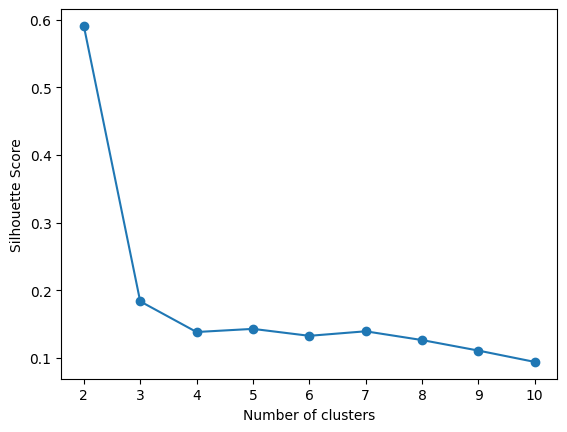

The best number of clusters is: 2


In [134]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

scaler = StandardScaler()
encoded_features_scaled = scaler.fit_transform(encoded_features)
# Dùng silhouette score để đánh giá chất lượng của việc phân cụm
silhouette_scores = []
possible_clusters = range(2, 11)  # Thử nghiệm từ 2 đến 10 cụm

for num_clusters in possible_clusters:
    kmeans = KMeans(n_clusters=num_clusters, n_init='auto')
    cluster_labels = kmeans.fit_predict(encoded_features_scaled)
    silhouette_scores.append(silhouette_score(encoded_features_scaled, cluster_labels))

# Vẽ biểu đồ silhouette score
plt.plot(possible_clusters, silhouette_scores, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Score')
plt.show()

# Tìm số lượng cụm tốt nhất (số cụm tương ứng với silhouette score lớn nhất)
best_num_clusters = possible_clusters[silhouette_scores.index(max(silhouette_scores))]
print(f"The best number of clusters is: {best_num_clusters}")


In [135]:
def kmeans_clustering(encoded_features, num_clusters):
    # Chuẩn hóa dữ liệu
    scaler = StandardScaler()
    encoded_features_scaled = scaler.fit_transform(encoded_features)

    # Sử dụng K-means để phân cụm người dùng

    kmeans = KMeans(n_clusters=num_clusters, random_state=42, n_init='auto')
    cluster_labels = kmeans.fit_predict(encoded_features_scaled)
    
    # Count the number of members in each cluster
    unique_labels, counts = np.unique(cluster_labels, return_counts=True)
    
    # Print or return the counts
    for label, count in zip(unique_labels, counts):
        print(f'Cluster {label}: {count} members')
        
    return cluster_labels

In [136]:
num_clusters=2

In [137]:
cluster_labels = kmeans_clustering(encoded_features, num_clusters=num_clusters)
cluster_labels

Cluster 0: 6080 members
Cluster 1: 391 members


array([0, 0, 0, ..., 0, 0, 0], dtype=int32)

In [138]:
cluster_labels.shape

(6471,)

In [139]:
train.loc[:, 'cluster_label'] = cluster_labels[train['UID']-1]

In [140]:
train

,UID,MID,rate,cluster_label
0,1187,4064,6,0
1,5866,4064,6,0
2,3033,4064,9,0
3,1406,4064,7,0
4,841,4064,8,0
...,...,...,...,...
38061,2190,135,6,0
38062,1530,135,9,0
38063,1308,135,7,0
38064,6009,135,6,0


Tạo ma trận item rating

In [141]:
num_item = len(train['MID'].unique())
item_ratings = np.zeros((num_clusters, num_item))
item_ratings.shape

(2, 4506)

In [142]:
new_index = np.arange(1, 4507)
def compute_item_ratings(num_cluster, train):
    # Compute item ratings based on cluster similarity
    num_item = len(train['MID'].unique())
    item_ratings = np.zeros((num_cluster, num_item))
    for i, cluster_label in enumerate(range(num_cluster)):
        cluster_members = train[train['cluster_label'] == cluster_label]

        cluster_ratings = cluster_members.groupby('MID')['rate'].mean()
        item_ratings[i, :] = cluster_ratings.reindex(new_index, fill_value=0).reset_index()['rate']

    return item_ratings

In [143]:
item_ratings_matrix = compute_item_ratings(num_cluster=num_clusters, train=train)
item_ratings_matrix[:, 3]

array([7.1, 0. ])

In [144]:
item_ratings_matrix.shape

(2, 4506)

Tạo ma trận user,những user thuộc cluster nào thì sẽ được đánh là 1

In [145]:
user_matrix = pd.DataFrame(cluster_labels, columns=['cluster_lable']).reset_index()
user_cluster_matrix = pd.get_dummies(user_matrix['cluster_lable']).astype(int).to_numpy()
user_cluster_matrix


array([[1, 0],
       [1, 0],
       [1, 0],
       ...,
       [1, 0],
       [1, 0],
       [1, 0]])

In [146]:
print(user_cluster_matrix.shape)

(6471, 2)


# Finding Similarity between items (Pretrained Below)

##  Preprocessing

In [ ]:
df_item = train_by_user.drop_duplicates(subset=['HotelID']).sort_values(by=['HotelID'])
df_item

In [ ]:
df_item = df_item[['HotelID', 'Descriptions']]

In [ ]:
df_item

In [ ]:
with open('/kaggle/input/stopword-vn/vietnamese.txt', 'r', encoding='utf-8') as file: 
    stopwordvn = file.readlines()
    list_stopword = list(set(w.strip() for w in stopwordvn))
    

In [ ]:
#Xử lý lowecrcase, stopword 
def preprocessing_data(data):
    data = data.lower()
    #Xử lý dấu câu và ký tự đặc biệt
    data = re.sub(r"[^\w\s]", " ", data)
    #Loại bỏ stopword
    data = ' '.join([word for word in data.split() if word not in list_stopword])
    #Word segment
    data = word_tokenize(data, format='text')
    #Chuyển về wordembedding
    token = tokenizer(data, return_tensors='pt', max_length=256, truncation=True)
    with torch.no_grad():
        embedding = phobert(**token).last_hidden_state.mean(dim=1)
        
    return embedding

In [ ]:
from tqdm import tqdm

In [ ]:
from sklearn.metrics.pairwise import linear_kernel

In [ ]:
embeddings = []
for i in tqdm(range(0, len(df_item))):
    embedding = preprocessing_data(df_item['Descriptions'].iloc[i])[0].numpy()
    embeddings.append(embedding)

In [ ]:
cosine_sim = linear_kernel(embeddings, embeddings)

In [ ]:
with open('cosine_sim_item_linear_kernel.pkl', 'wb') as file: 
    pickle.dump(cosine_sim, file)

# Load file Item-similarity Pretrained

In [147]:
with open('/kaggle/input/item-similarity/cosine_sim_item_linear_kernel.pkl', 'rb') as file:
    # Sử dụng pickle.load để load dữ liệu từ file
    cosine_sim = pickle.load(file)

In [148]:
cosine_sim

array([[30.673069, 30.312088, 27.652016, ..., 29.261345, 20.42305 ,
        29.533005],
       [30.312088, 36.153458, 30.171526, ..., 31.38098 , 22.323763,
        32.031742],
       [27.652016, 30.171526, 31.846298, ..., 30.213017, 19.213648,
        30.717478],
       ...,
       [29.261345, 31.38098 , 30.213017, ..., 32.32114 , 20.271591,
        30.634575],
       [20.42305 , 22.323763, 19.213648, ..., 20.271591, 29.061543,
        20.106825],
       [29.533005, 32.031742, 30.717478, ..., 30.634575, 20.106825,
        33.94046 ]], dtype=float32)

In [149]:
cosine_sim.shape

(4506, 4506)

In [150]:

def get_top_similar_items(itemid, topk):
    sim_scores = list(enumerate(cosine_sim[itemid]))
    sim_item = sorted(sim_scores, key=lambda x: x[1], reverse=True)
    list_sim_itemid = [item[0] for item in sim_item[1:topk]]
    return list_sim_itemid 

In [151]:
get_top_similar_items(1, 10)

[2532, 3069, 1972, 679, 349, 1628, 4363, 104, 1088]

# Update the rating based on similar items in a cluster

In [152]:
item_ratings_matrix[0][0]

8.1

In [153]:
item_ratings_matrix.shape

(2, 4506)

In [154]:
def update_rating(item_ratings_matrix, topk):
    for i in range(item_ratings_matrix.shape[0]): #tính theo từng cluster
        for item in range(item_ratings_matrix.shape[1]): #tính theo từng item
            if item_ratings_matrix[i][item] == 0: 
                top_sim_item = get_top_similar_items(item, topk)
                all_score_cluster = [item_ratings_matrix[i][j] for j in top_sim_item if item_ratings_matrix[i][j] !=0]
                avg_rating = sum(all_score_cluster)/(len(all_score_cluster)+1e-5)
                #cập nhật rating cho vị trí bằng 0
                item_ratings_matrix[i][item] = avg_rating
                
                
    return item_ratings_matrix

In [155]:
item_ratings_matrix

array([[8.1       , 7.        , 8.22222222, ..., 8.        , 6.        ,
        9.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ]])

In [156]:
update_rating_matrix = update_rating(item_ratings_matrix, topk=360)

In [157]:
update_rating_matrix

array([[8.1       , 7.        , 8.22222222, ..., 8.        , 6.        ,
        9.        ],
       [6.33331222, 6.33331222, 5.99994   , ..., 6.28952491, 7.81160133,
        6.29695814]])

In [158]:
update_rating_matrix.shape

(2, 4506)

In [159]:
user_cluster_matrix.shape

(6471, 2)

In [160]:
def user_item_matrix(user_cluster_matrix, update_rating_matrix):
    result_dot = np.dot(user_cluster_matrix, update_rating_matrix)
    return result_dot

In [161]:
user_rating_matrix = user_item_matrix(user_cluster_matrix, update_rating_matrix)
user_rating_matrix

array([[8.1       , 7.        , 8.22222222, ..., 8.        , 6.        ,
        9.        ],
       [8.1       , 7.        , 8.22222222, ..., 8.        , 6.        ,
        9.        ],
       [8.1       , 7.        , 8.22222222, ..., 8.        , 6.        ,
        9.        ],
       ...,
       [8.1       , 7.        , 8.22222222, ..., 8.        , 6.        ,
        9.        ],
       [8.1       , 7.        , 8.22222222, ..., 8.        , 6.        ,
        9.        ],
       [8.1       , 7.        , 8.22222222, ..., 8.        , 6.        ,
        9.        ]])

In [162]:
user_rating_matrix.shape

(6471, 4506)

# Evaluation

In [163]:
def get_list_4test(user_rating_matrix, test):
    test_list = []
    for i in range(test.shape[0]):
        rating = user_rating_matrix[test.iloc[i]['UID'] - 1][test.iloc[i]['MID'] - 1]
        test_list.append(rating)
    
    return test_list

In [164]:
test_list = get_list_4test(user_rating_matrix, test)
test_list[:10]

[7.285714285714286,
 8.333333333333334,
 8.333333333333334,
 7.5,
 7.0,
 7.285714285714286,
 6.5,
 7.5,
 7.5,
 7.8]

In [165]:
ground_truth = test['rate'].values
ground_truth[:10]

array([5, 6, 7, 8, 7, 6, 8, 6, 6, 7])

> MSE

In [166]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(ground_truth , test_list)
print('MSE =',mse)

MSE = 2.3909083962867035


RMSE

In [167]:
import math
rmse = math.sqrt(mse)
print('RMSE =',rmse)     

RMSE = 1.5462562518181466


MAE

In [168]:
from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(ground_truth , test_list)
print('MAE =',mae)

MAE = 1.3228795011419636


NMAE

In [169]:
MAX = max(test['rate'].tolist())
MIN = min(test['rate'].tolist())

nmae = mae/(MAX-MIN)
print('----- NMAE =',nmae)

----- NMAE = 0.22047991685699395


# Save result

In [170]:
with open('ghuc.pkl', 'wb') as file:
    pickle.dump(user_rating_matrix, file)